In [175]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]) 
y_train = np.array([0, 0, 0, 1, 1, 1])      

In [176]:
import math
import numpy as np

In [177]:
def log(x):
    eps = 1e-15
    return math.log(max(x,eps))

In [178]:
#sigmoid prediction
def f(w,b,x):
    z=np.dot(w,x)+b 
    res=1/(1+(np.exp(-z)))
    return res

In [179]:
#loss function

def L(w,b,x,y):
    return -y*(log(f(w,b,x)))-(1-y)*(log(1- f(w,b,x)))

In [180]:
def cost(w,b,x,y):
    m=len(x)
    n=len(x[0])
    cost=0
    for i in range(m):
        cost+= L(w,b,x[i],y[i])
    return cost/m

In [181]:
w=np.array([2.,3.])
b=1.

In [182]:
cost(w,b,x_train,y_train)      #yay!

3.0013840206452973

In [183]:
cost(w,-4,x_train,y_train)

0.6708427493936672

In [184]:
def dJ_dwj(w,b,x,y,j):
    res=0
    m=len(x)
    for i in range(len(x)):
        res+= (f(w,b,x[i])-y[i])*(x[i][j])
    return res/m

In [185]:
dJ_dwj(w,b,x_train,y_train,0),dJ_dwj(w,b,x_train,y_train,1)

(0.498333393278696, 0.49883942983996693)

In [186]:
def dJ_db(w,b,x,y):
    res=0
    m=len(x)
    for i in range(len(x)):
        res+=(f(w,b,x[i])-y[i])
    return res/m

In [187]:
dJ_db(w,b,x_train,y_train)

0.49861806546328574

In [188]:
cost_history=[]
def gradient_descent(w,b,x,y,init_cost,l_r,cost_history,max_steps=10000,step=0):
    m=len(x)
    n=len(w)
    new_w=w.copy()
    if init_cost is None:
        init_cost=cost(w,b,x,y)
    for i in range(n):
        new_w[i]-= (l_r)*(dJ_dwj(new_w,b,x,y,i))
    new_b=b-(l_r)*(dJ_db(new_w,b,x,y))
    new_cost=cost(new_w,new_b,x,y)
    cost_history.append(new_cost)
    if new_cost<init_cost and step<max_steps:
        step+=1
        return gradient_descent(new_w,new_b,x,y,new_cost,l_r,cost_history,max_steps,step)
    else:
        return new_w, new_b , cost_history
        

In [189]:
w=np.array([0.,0.])
b=0

In [190]:
import sys
sys.setrecursionlimit(100000)

In [192]:
gradient_descent(w,b,x_train,y_train,None,0.1,cost_history)

(array([5.28572314, 5.08243606]),
 -14.23466419529145,
 [0.6847495572013744,
  0.6779458052281836,
  0.6723562872945599,
  0.6676922267704434,
  0.6637345573045889,
  0.6603172629350009,
  0.6573145103250971,
  0.6546308307839298,
  0.6521936841860646,
  0.649947849938555,
  0.6478512040567027,
  0.6458715410652184,
  0.6439841807777593,
  0.6421701638592777,
  0.6404148890545364,
  0.6387070820152626,
  0.637038013452345,
  0.6354009050950035,
  0.633790477405585,
  0.6322026045190036,
  0.6306340504624403,
  0.6290822671198811,
  0.6275452391986732,
  0.6260213650469556,
  0.624509364868781,
  0.6230082099151988,
  0.6215170677628072,
  0.6200352599511868,
  0.6185622291300606,
  0.6170975135352316,
  0.6156407271210781,
  0.6141915440654574,
  0.6127496866593916,
  0.611314915820904,
  0.6098870236463791,
  0.6084658275464189,
  0.6070511656158923,
  0.6056428929669463,
  0.604240878814707,
  0.6028450041524422,
  0.6014551598893009,
  0.6000712453518701,
  0.5986931670725618,
  0.5

In [ ]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

In [193]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'J(w,b)')

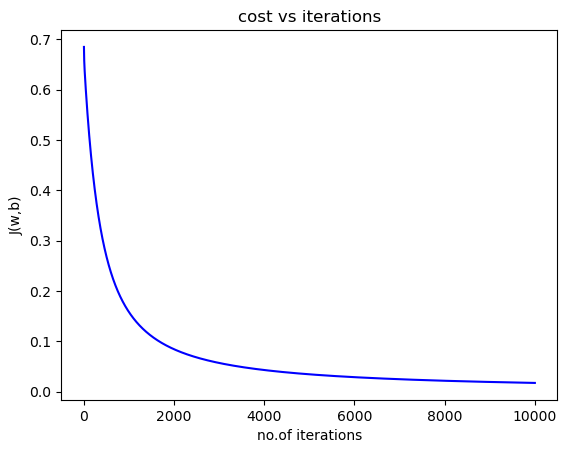

In [197]:
plt.plot(np.arange(len(cost_history)),cost_history,color='b')
plt.title('cost vs iterations')
plt.xlabel('no.of iterations')
plt.ylabel('J(w,b)')